In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
# print(pd.__version__)
import leaguedata as ld
from sklearn.model_selection import train_test_split

#Progress bars wooo
from ipywidgets import IntProgress
from IPython.display import display
from IPython.display import Markdown

In [64]:
data1 = pd.read_csv("final_data_1.csv")
data2 = pd.read_csv("final_data_2.csv")
data = data1.append(data2)

print("Splitting: " + str(len(data)) + " samples")

y = data['Blue win'].values
X = data.drop(['Blue win','Address'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)
print(len(X_test)/len(X), len(X_train)/len(X))

Splitting: 21577 samples
0.20002780738749595 0.7999721926125041


In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [67]:
#tree_depth = 3
clf1 = DecisionTreeClassifier(max_depth = 20, min_impurity_decrease=0.01)
clf1.fit(X_train, y_train)

correct = sum(y_test == clf1.predict(X_test))
total = len(X_test)

# your code here
y_true = y_test
y_pred = clf1.predict(X_test)

print("___Test set scores___")
print("Accuracy score: " + str(accuracy_score(y_true, y_pred)))
print("Precision score: " + str(precision_score(y_true, y_pred)))
print("Recall score: " + str(recall_score(y_true, y_pred)))

___Test set scores___
Accuracy score: 0.7286839666357738
Precision score: 0.718019801980198
Recall score: 0.797975352112676


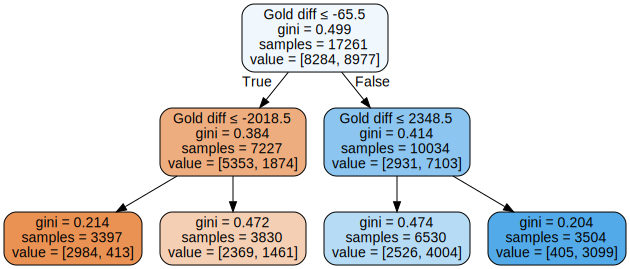

In [68]:
# graphing stuff
import sklearn.tree as tree
import graphviz
dot_data = tree.export_graphviz(clf1, out_file=None)
graph = graphviz.Source(dot_data)
predictors = X_train.columns
dot_data = tree.export_graphviz(clf1, out_file=None, feature_names = predictors, filled = True, rounded = True, special_characters = True)
graph = graphviz.Source(dot_data)
graph